In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
csv_path = "../Project_1_AirPollution_vs_GDPperCapita/Original CO2 emissions dataset.csv"
CO2data_df = pd.read_csv(csv_path, encoding = 'unicode_escape')
CO2data_df.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.41388,0.49080,0.68859,0.70674,0.83855,1.0069,1.0912,1.28190,1.2234,...,4.19830,6.76030,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,2.02250,2.27900,2.46220,2.08120,2.01520,2.1728,2.5501,2.67840,3.0704,...,4.37120,4.37480,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,6.15120,6.05590,5.66100,5.41920,5.64300,6.5885,8.4209,8.43160,9.0502,...,109.03180,120.18590,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53861,0.51662,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,0.54895,0.45371,1.17910,1.14970,1.22290,1.1862,1.5525,0.99181,1.6695,...,25.48600,27.56550,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [3]:
CO2data_df_headers=list(CO2data_df.columns.values)
CO2data_df_years = CO2data_df_headers[-59:]
CO2data_df_years_drop = CO2data_df_years[1:51]
CO2data_df_1= CO2data_df.drop(CO2data_df_years_drop,axis=1)
CO2data_df_1.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [5]:
CO2data_df_2 = CO2data_df_1.sort_values(by=['2017'],ascending=False)
CO2data_df_2 = CO2data_df_2.loc[:,:'2017']
CO2data_df_2.head(10)

,Country,2010,2011,2012,2013,2014,2015,2016,2017
41,China,8500.5427,9388.1992,9633.8993,9796.5272,9820.3605,9716.4678,9704.4794,9838.7540
209,United States of America,5701.0758,5570.7066,5366.7303,5519.6126,5568.7593,5420.8041,5310.8614,5269.5295
91,India,1700.0274,1817.1716,1983.7588,1997.8786,2207.5339,2276.4072,2377.4479,2466.7654
163,Russian Federation,1657.5607,1712.4248,1726.0995,1665.9886,1667.1107,1671.8951,1668.0699,1692.7948
99,Japan,1211.5729,1261.3986,1302.0829,1314.0696,1264.1733,1223.6665,1204.3186,1205.0612
75,Germany,833.6849,810.8023,815.1974,832.6430,793.6358,797.0782,801.7530,799.3732
93,Iran,564.0345,579.0400,600.6803,608.9629,639.1113,630.3618,637.5622,672.3123
172,Saudi Arabia,517.7159,497.6590,563.1795,540.8052,601.8961,620.8830,631.5492,635.0111
183,South Korea,565.9609,588.4351,583.6320,591.5397,586.5480,590.5575,595.0737,616.0967
35,Canada,555.4597,560.7759,563.6752,568.8924,568.0084,565.5767,558.1890,572.7826


In [9]:
Country = CO2data_df_2.set_index('Country')
df_plot_by_country = Country.T
df_plot_by_country

Country,China,United States of America,India,Russian Federation,Japan,Germany,Iran,Saudi Arabia,South Korea,Canada,...,Niue,Saint Helena,Cayman Islands,Falkland Islands (Malvinas),French Guiana,Gibraltar,Guadeloupe,Martinique,Runion,Western Sahara
2010,8500.5427,5701.0758,1700.0274,1657.5607,1211.5729,833.6849,564.0345,517.7159,565.9609,555.4597,...,0.003664,0.010992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,9388.1992,5570.7066,1817.1716,1712.4248,1261.3986,810.8023,579.0400,497.6590,588.4351,560.7759,...,0.007328,0.010992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,9633.8993,5366.7303,1983.7588,1726.0995,1302.0829,815.1974,600.6803,563.1795,583.6320,563.6752,...,0.007328,0.010992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,9796.5272,5519.6126,1997.8786,1665.9886,1314.0696,832.6430,608.9629,540.8052,591.5397,568.8924,...,0.007328,0.010992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,9820.3605,5568.7593,2207.5339,1667.1107,1264.1733,793.6358,639.1113,601.8961,586.5480,568.0084,...,0.010992,0.010992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,9716.4678,5420.8041,2276.4072,1671.8951,1223.6665,797.0782,630.3618,620.8830,590.5575,565.5767,...,0.011995,0.011475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,9704.4794,5310.8614,2377.4479,1668.0699,1204.3186,801.7530,637.5622,631.5492,595.0737,558.1890,...,0.012133,0.011698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,9838.7540,5269.5295,2466.7654,1692.7948,1205.0612,799.3732,672.3123,635.0111,616.0967,572.7826,...,0.012955,0.011696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_plot_by_country.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

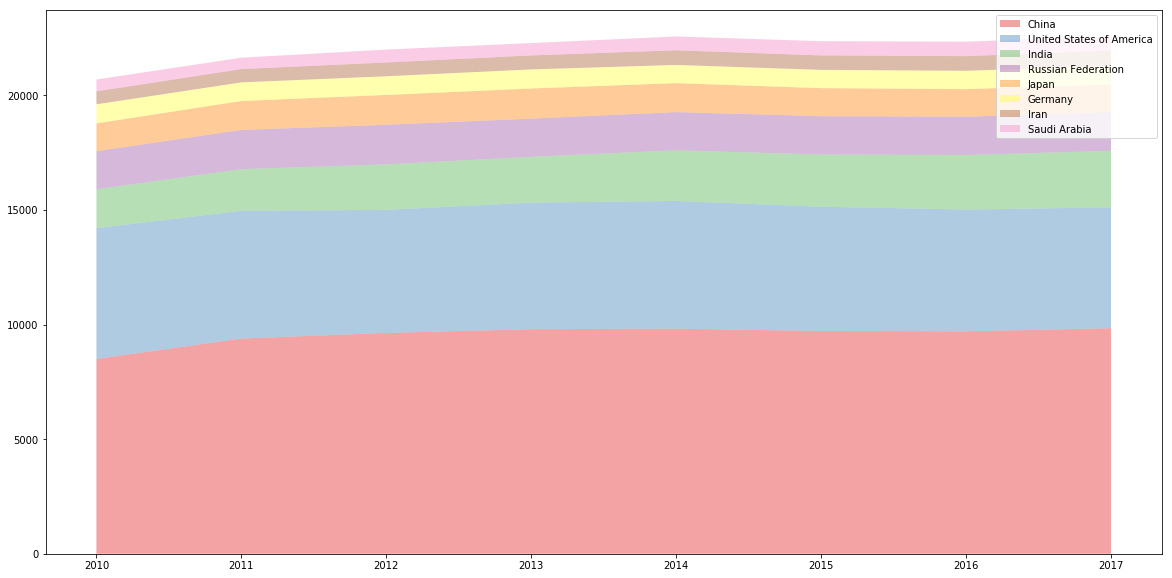

In [33]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

c = list(df_plot_by_country['China'])
i = list(df_plot_by_country['India'])
# Your x and y axis
top_country = 8
x=list(df_plot_by_country.index)[:top_country]
country_name_list = list(df_plot_by_country.columns)[:top_country]
y=[list(df_plot_by_country[country_name]) for country_name in country_name_list]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=country_name_list, colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.show()
 
plt.title("CO2 Emissions, by countries")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")

# # create your palette
# pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
# plt.legend(loc='upper right')


In [11]:
country_name_list = list(df_plot_by_country.columns)
for country_name in country_name_list:
    


['China',
 'United States of America',
 'India',
 'Russian Federation',
 'Japan',
 'Germany',
 'Iran',
 'Saudi Arabia',
 'South Korea',
 'Canada',
 'Mexico',
 'Indonesia',
 'Brazil',
 'South Africa',
 'Turkey',
 'Australia',
 'United Kingdom',
 'France',
 'Italy',
 'Thailand',
 'Poland',
 'Kazakhstan',
 'Spain',
 'Taiwan',
 'Malaysia',
 'United Arab Emirates',
 'Egypt',
 'Ukraine',
 'Argentina',
 'Vietnam',
 'Pakistan',
 'Iraq',
 'Netherlands',
 'Venezuela',
 'Algeria',
 'Qatar',
 'Philippines',
 'Czech Republic',
 'Nigeria',
 'Kuwait',
 'Belgium',
 'Uzbekistan',
 'Bangladesh',
 'Chile',
 'Colombia',
 'Romania',
 'Greece',
 'Turkmenistan',
 'Austria',
 'Israel',
 'Oman',
 'Peru',
 'Singapore',
 'Morocco',
 'Belarus',
 'North Korea',
 'Portugal',
 'Libya',
 'Hungary',
 'Bulgaria',
 'Finland',
 'Serbia',
 'Norway',
 'Hong Kong',
 'Sweden',
 'Trinidad and Tobago',
 'Switzerland',
 'Ireland',
 'Ecuador',
 'Azerbaijan',
 'Cuba',
 'New Zealand',
 'Angola',
 'Slovakia',
 'Denmark',
 'Bahrain'